In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0059.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0024.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0232.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0286.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0233.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0123.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0150.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-piTr_0009.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0078.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0283.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0084.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pit

In [2]:
base_path = "/kaggle/input/brain-tumour-classification/BrainTumor_1/Train"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [3]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [4]:
df.head()

,image_path,label
0,/kaggle/input/brain-tumour-classification/Brai...,glioma
1,/kaggle/input/brain-tumour-classification/Brai...,glioma
2,/kaggle/input/brain-tumour-classification/Brai...,glioma
3,/kaggle/input/brain-tumour-classification/Brai...,glioma
4,/kaggle/input/brain-tumour-classification/Brai...,glioma


In [5]:
df.tail()

,image_path,label
22843,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22844,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22845,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22846,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22847,/kaggle/input/brain-tumour-classification/Brai...,pituitary


In [6]:
df.shape

(22848, 2)

In [7]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [9]:
df['label'].value_counts()

label
notumor       6380
pituitary     5828
meningioma    5356
glioma        5284
Name: count, dtype: int64

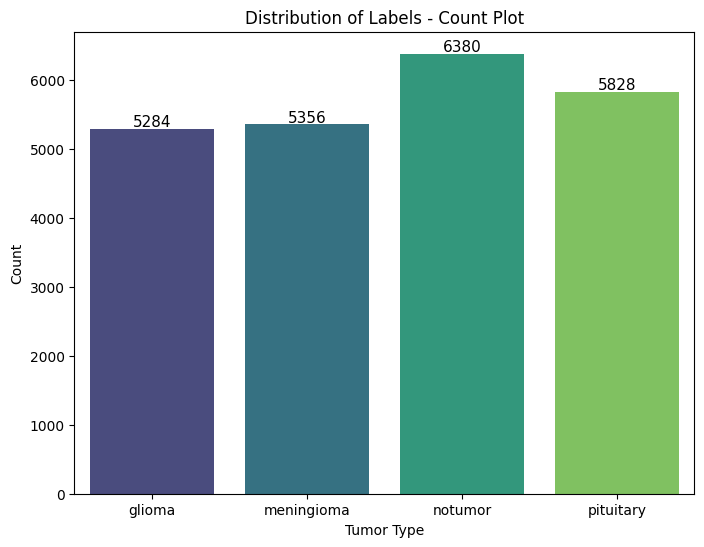

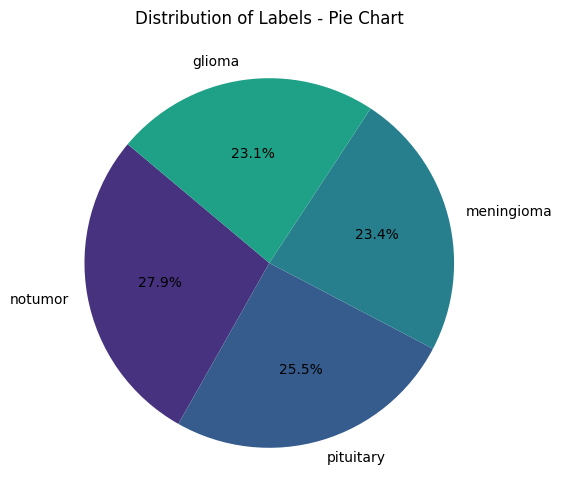

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

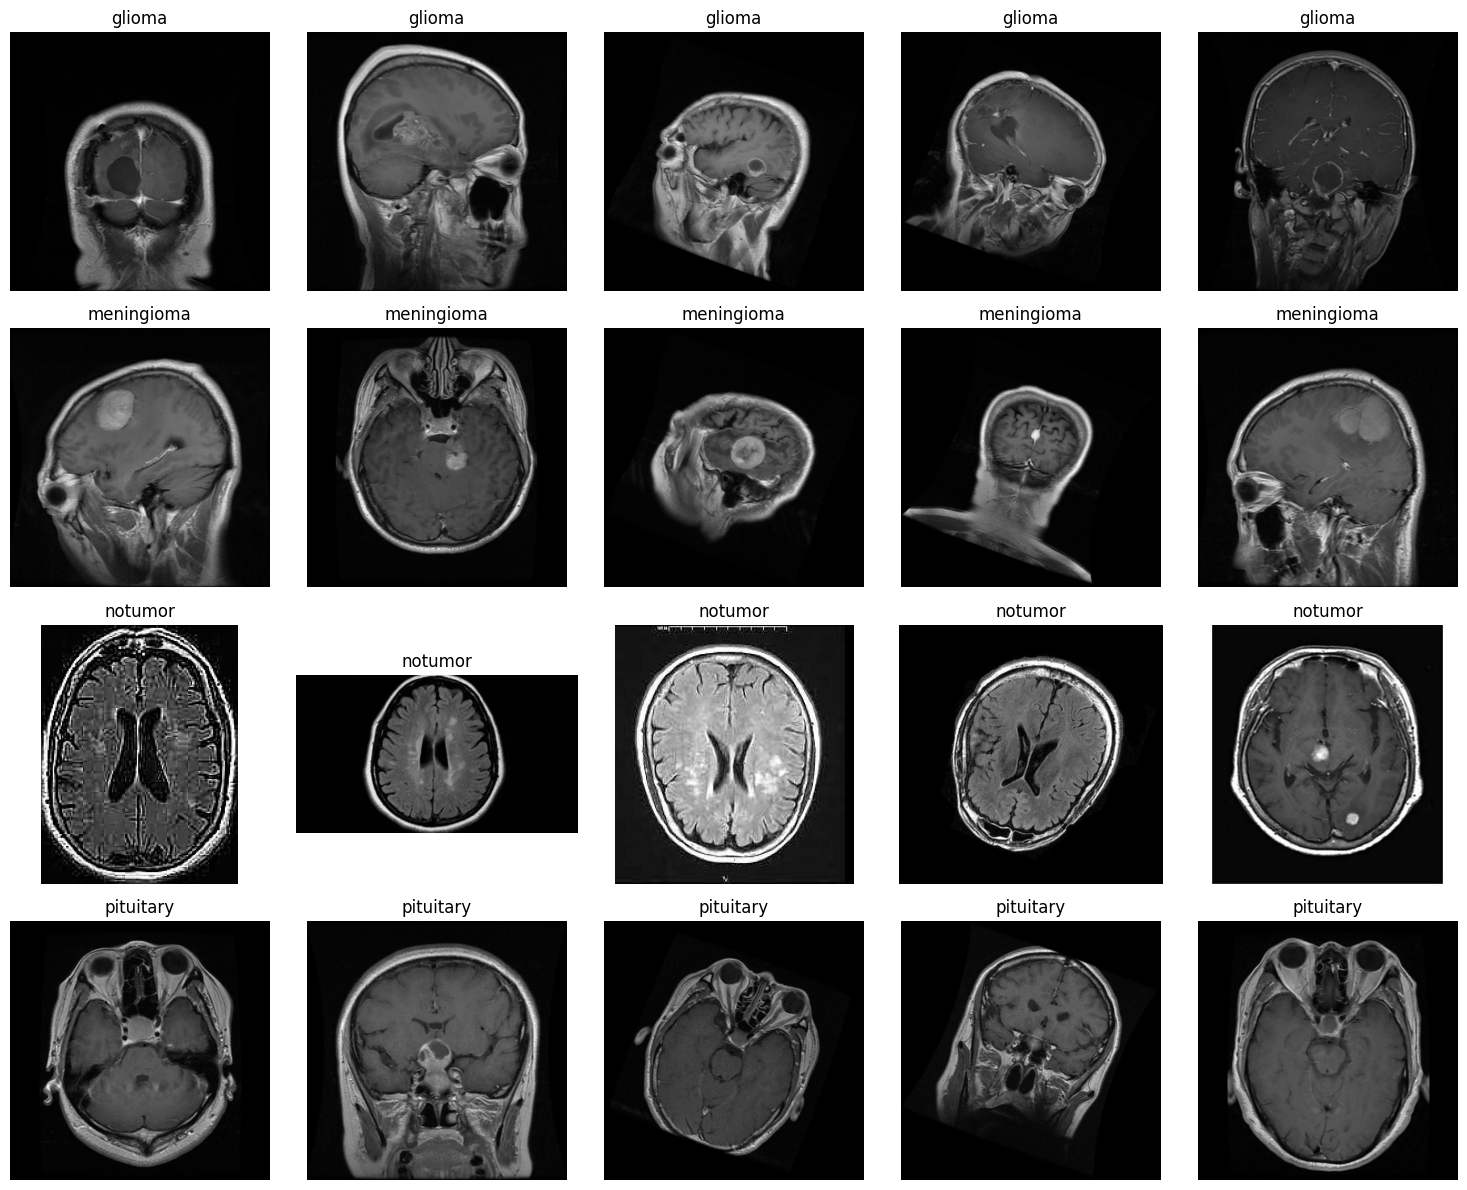

In [11]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [13]:
df = df[['image_path', 'category_encoded']]

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [16]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [17]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    6380
1    6380
2    6380
3    6380
Name: count, dtype: int64


In [18]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/brain-tumour-classification/Brai...,0
1,/kaggle/input/brain-tumour-classification/Brai...,0
2,/kaggle/input/brain-tumour-classification/Brai...,0
3,/kaggle/input/brain-tumour-classification/Brai...,0
4,/kaggle/input/brain-tumour-classification/Brai...,0
...,...,...
25515,/kaggle/input/brain-tumour-classification/Brai...,3
25516,/kaggle/input/brain-tumour-classification/Brai...,3
25517,/kaggle/input/brain-tumour-classification/Brai...,3
25518,/kaggle/input/brain-tumour-classification/Brai...,3


In [19]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [20]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [21]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 20416 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, 
                                     GaussianNoise, Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

def create_vgg16_model(input_shape):
   
    inputs = Input(shape=input_shape)
    
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512  
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg16_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [28]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730616392.742667     299 service.cc:145] XLA service 0x7a917c0018a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730616392.742725     299 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730616392.742730     299 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1730616404.835907     338 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1284 bytes spill stores, 1272 bytes spill loads



   1/1276 ━━━━━━━━━━━━━━━━━━━━ 9:55:19 28s/step - accuracy: 0.2500 - loss: 1.9726

I0000 00:00:1730616416.859234     299 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7626 - loss: 0.6298

I0000 00:00:1730616537.083262     399 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6', 1280 bytes spill stores, 1268 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 154s 99ms/step - accuracy: 0.7627 - loss: 0.6296 - val_accuracy: 0.6759 - val_loss: 1.0673
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 116s 90ms/step - accuracy: 0.8798 - loss: 0.3314 - val_accuracy: 0.8973 - val_loss: 0.2846
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 116s 90ms/step - accuracy: 0.9128 - loss: 0.2491 - val_accuracy: 0.8997 - val_loss: 0.2999
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 116s 90ms/step - accuracy: 0.9180 - loss: 0.2193 - val_accuracy: 0.7022 - val_loss: 1.3966
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 116s 90ms/step - accuracy: 0.9317 - loss: 0.1875 - val_accuracy: 0.5247 - val_loss: 2.6919


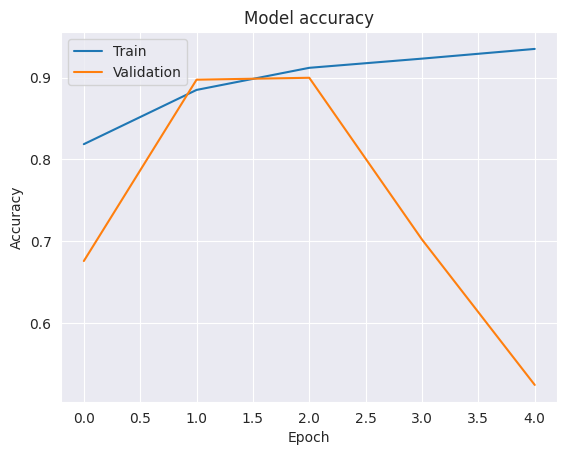

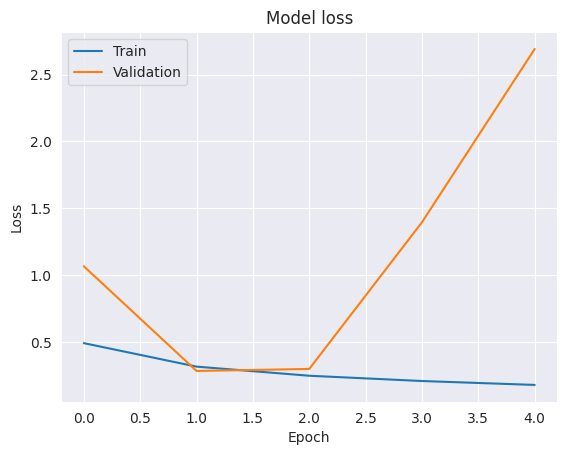

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step


In [31]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       638
           1       0.82      0.87      0.85       638
           2       0.95      0.98      0.97       638
           3       0.99      0.85      0.91       638

    accuracy                           0.91      2552
   macro avg       0.91      0.91      0.91      2552
weighted avg       0.91      0.91      0.91      2552



In [32]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

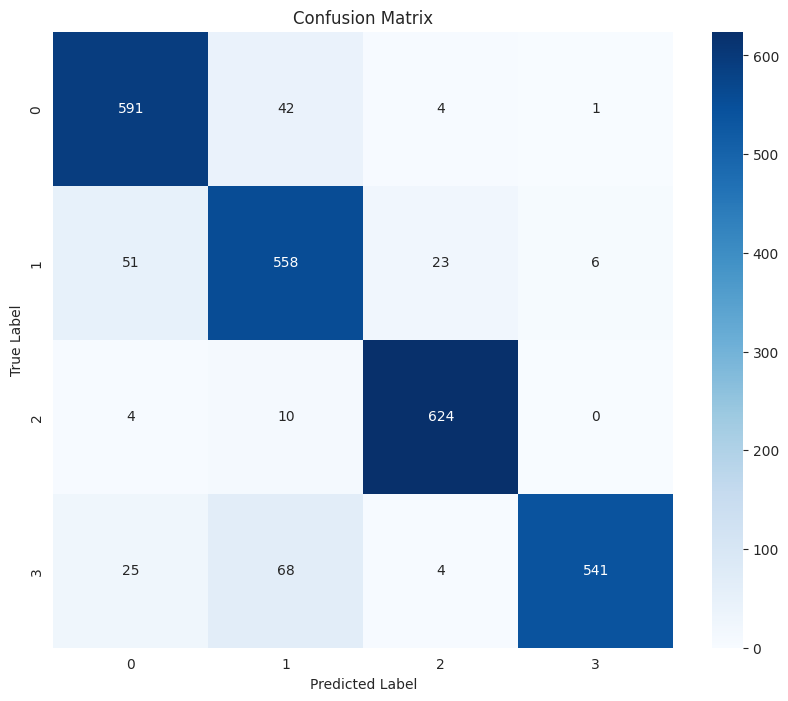

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_vgg19_model(input_shape):
  
    inputs = Input(shape=input_shape)
    
    base_model = VGG19(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512   
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg19_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 149s 110ms/step - accuracy: 0.7411 - loss: 0.6771 - val_accuracy: 0.7786 - val_loss: 0.6523
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 138s 108ms/step - accuracy: 0.8712 - loss: 0.3527 - val_accuracy: 0.8288 - val_loss: 0.5774
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 138s 108ms/step - accuracy: 0.9022 - loss: 0.2665 - val_accuracy: 0.8546 - val_loss: 0.3942
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 138s 108ms/step - accuracy: 0.9215 - loss: 0.2168 - val_accuracy: 0.8064 - val_loss: 0.5658
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 138s 108ms/step - accuracy: 0.9319 - loss: 0.1890 - val_accuracy: 0.9150 - val_loss: 0.2445


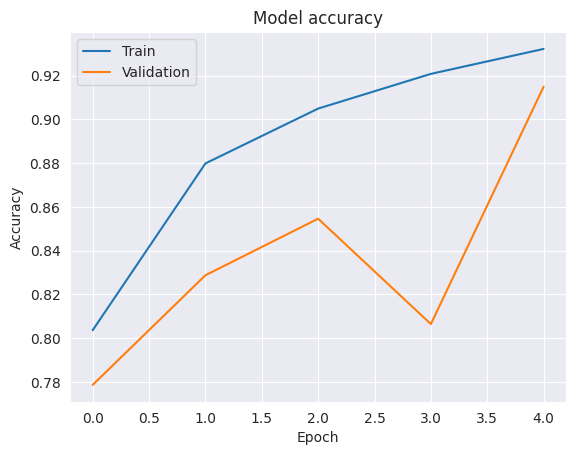

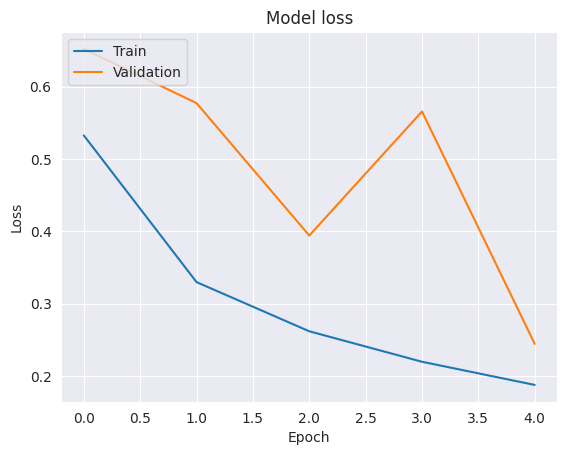

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step


In [38]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       638
           1       0.83      0.92      0.87       638
           2       0.97      0.97      0.97       638
           3       0.92      0.98      0.95       638

    accuracy                           0.92      2552
   macro avg       0.92      0.92      0.92      2552
weighted avg       0.92      0.92      0.92      2552



In [39]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

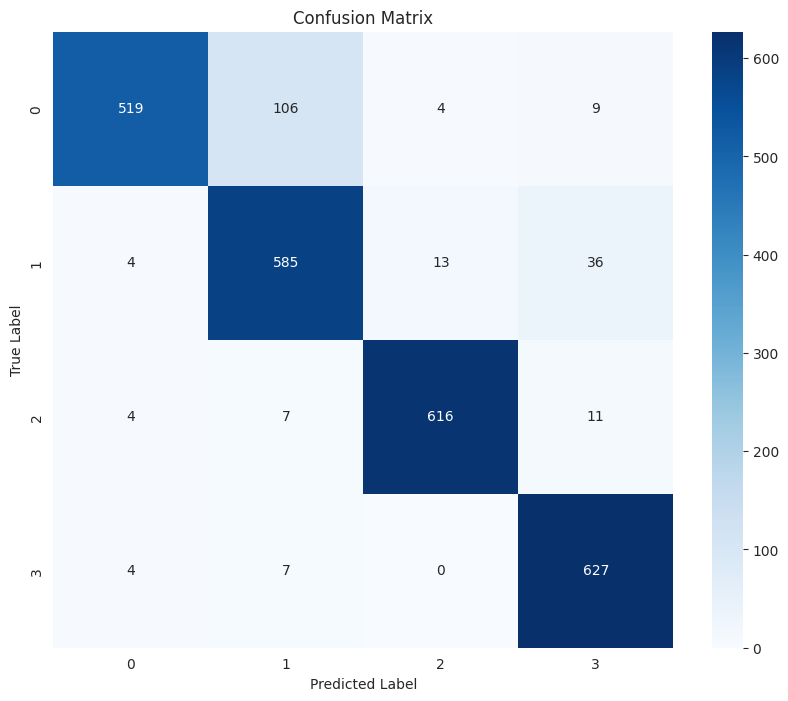

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)
  
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730617968.755983     673 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8556 - loss: 0.4049

I0000 00:00:1730618059.939100     726 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 109s 68ms/step - accuracy: 0.8557 - loss: 0.4048 - val_accuracy: 0.9412 - val_loss: 0.1564
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.9400 - loss: 0.1708 - val_accuracy: 0.8374 - val_loss: 0.5594
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 76s 59ms/step - accuracy: 0.9632 - loss: 0.1061 - val_accuracy: 0.9208 - val_loss: 0.2246
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 76s 59ms/step - accuracy: 0.9756 - loss: 0.0739 - val_accuracy: 0.9671 - val_loss: 0.1134
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 76s 60ms/step - accuracy: 0.9779 - loss: 0.0591 - val_accuracy: 0.9659 - val_loss: 0.1115


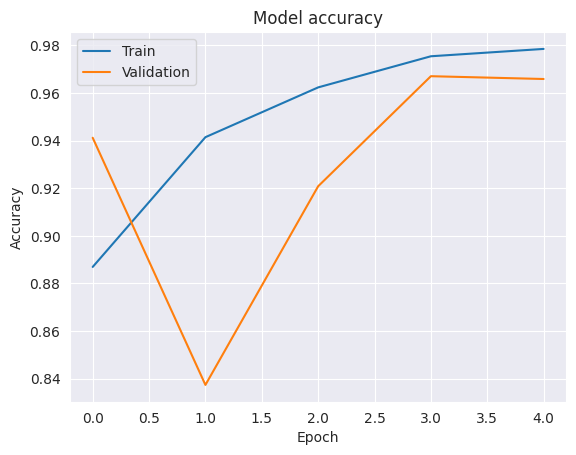

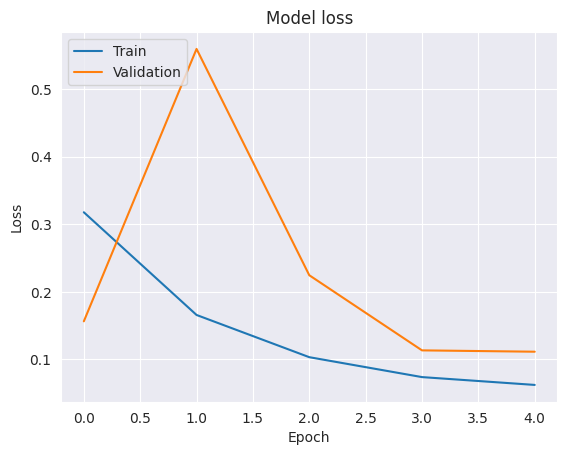

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step


In [45]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       638
           1       0.93      0.97      0.95       638
           2       1.00      0.98      0.99       638
           3       0.98      0.98      0.98       638

    accuracy                           0.97      2552
   macro avg       0.97      0.97      0.97      2552
weighted avg       0.97      0.97      0.97      2552



In [46]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

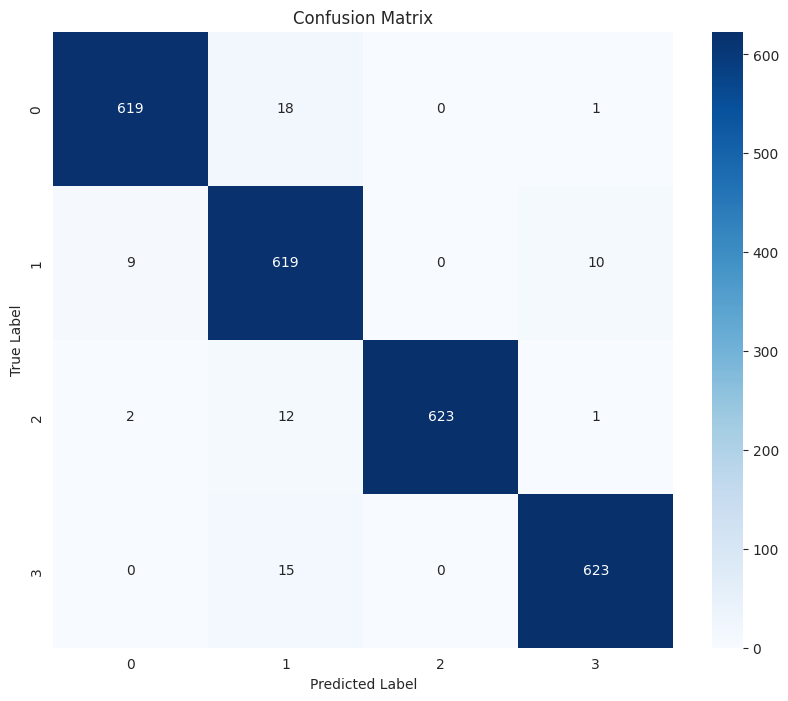

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [49]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730618526.007229     855 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7874 - loss: 0.5876

I0000 00:00:1730618864.402637     915 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 362s 260ms/step - accuracy: 0.7874 - loss: 0.5875 - val_accuracy: 0.9087 - val_loss: 0.2856
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 317s 248ms/step - accuracy: 0.8945 - loss: 0.2957 - val_accuracy: 0.9032 - val_loss: 0.2573
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 315s 247ms/step - accuracy: 0.9206 - loss: 0.2221 - val_accuracy: 0.8997 - val_loss: 0.2763
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 315s 247ms/step - accuracy: 0.9414 - loss: 0.1703 - val_accuracy: 0.9487 - val_loss: 0.1454
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 315s 247ms/step - accuracy: 0.9532 - loss: 0.1366 - val_accuracy: 0.9549 - val_loss: 0.1152


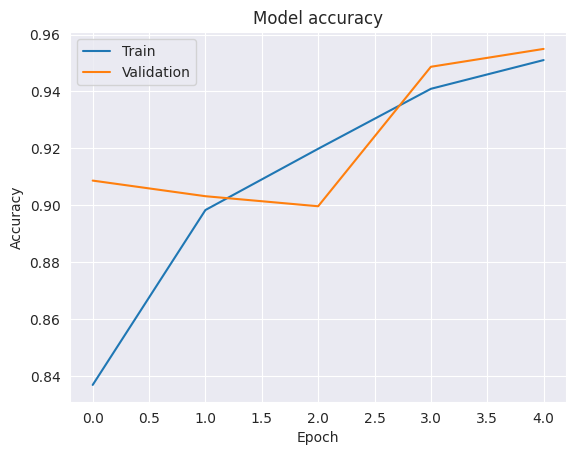

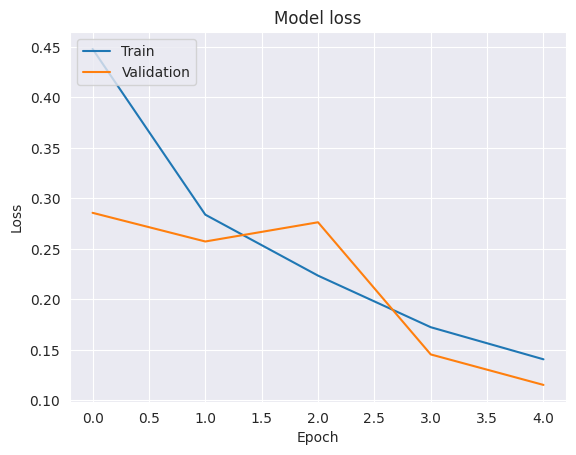

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step


In [52]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       638
           1       0.87      0.80      0.83       638
           2       0.90      0.98      0.94       638
           3       0.95      0.90      0.92       638

    accuracy                           0.91      2552
   macro avg       0.91      0.91      0.90      2552
weighted avg       0.91      0.91      0.90      2552



In [53]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

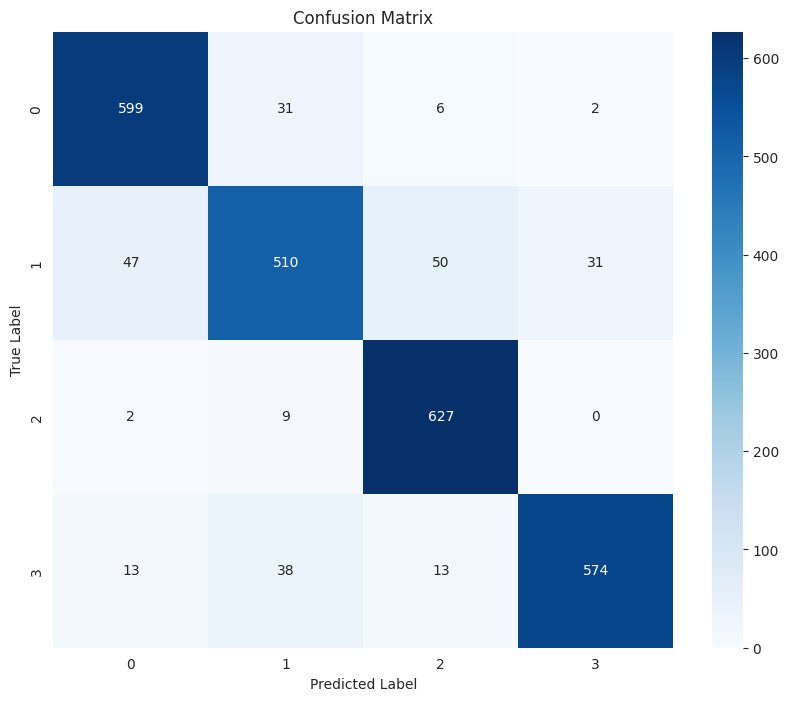

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [56]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730620812.574405    1045 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7763 - loss: 0.6269

I0000 00:00:1730621007.694029    1096 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 221s 149ms/step - accuracy: 0.7764 - loss: 0.6267 - val_accuracy: 0.8495 - val_loss: 0.5046
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 172s 135ms/step - accuracy: 0.8994 - loss: 0.2807 - val_accuracy: 0.5247 - val_loss: 1.6268
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 171s 134ms/step - accuracy: 0.9281 - loss: 0.2047 - val_accuracy: 0.9056 - val_loss: 0.2910
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 171s 134ms/step - accuracy: 0.9375 - loss: 0.1739 - val_accuracy: 0.9357 - val_loss: 0.1815
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 172s 134ms/step - accuracy: 0.9478 - loss: 0.1452 - val_accuracy: 0.7367 - val_loss: 0.9598


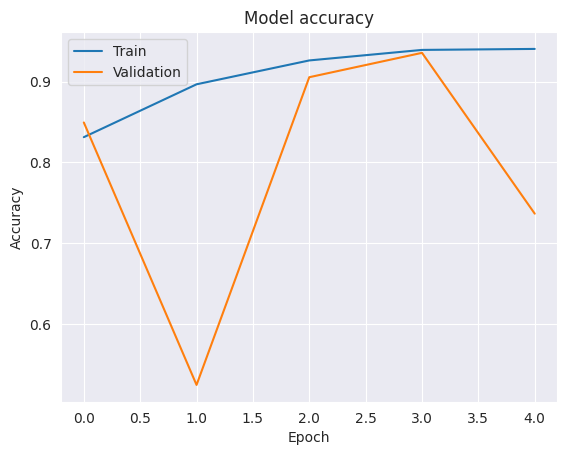

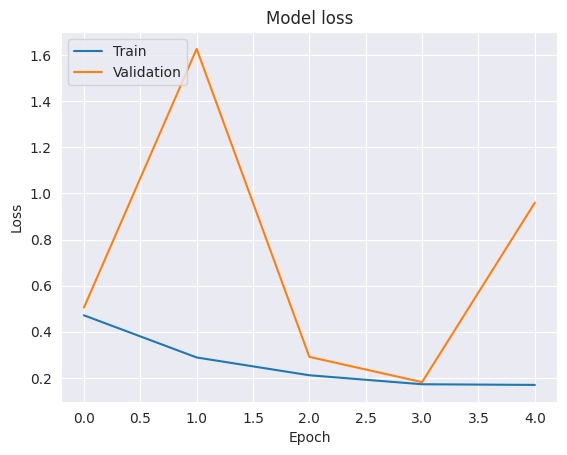

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [58]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step


In [59]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       638
           1       0.93      0.53      0.68       638
           2       0.94      0.96      0.95       638
           3       0.71      1.00      0.83       638

    accuracy                           0.85      2552
   macro avg       0.87      0.85      0.84      2552
weighted avg       0.87      0.85      0.84      2552



In [60]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

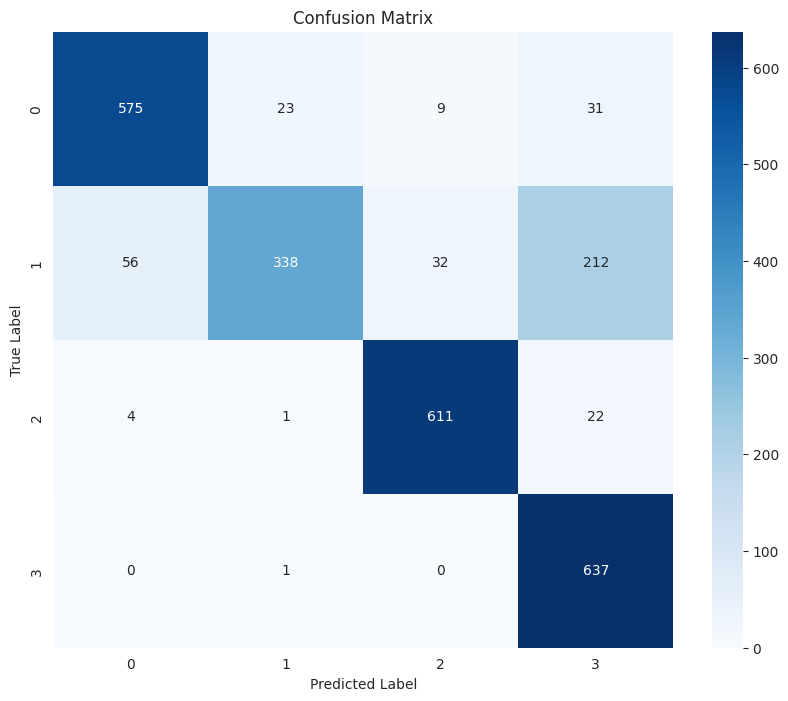

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

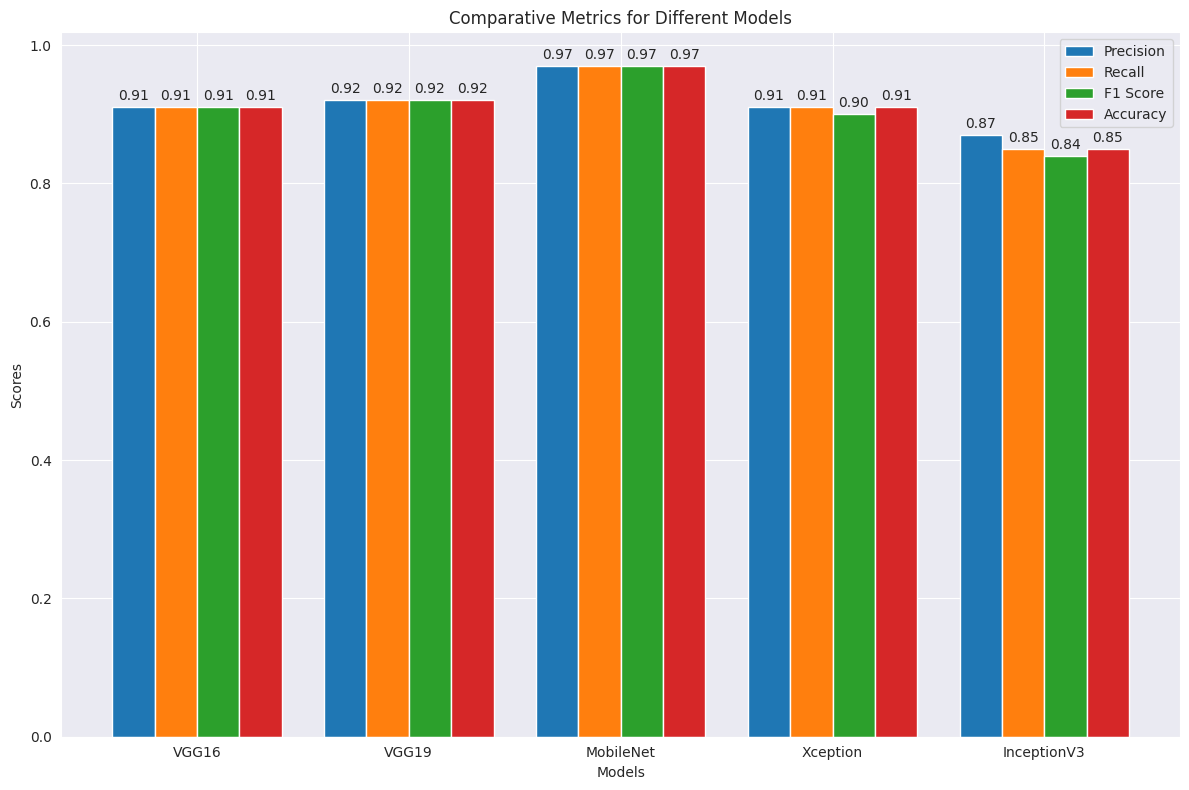

In [62]:
models = ['VGG16', 'VGG19', 'MobileNet', 'Xception', 'InceptionV3']
precision_scores = [0.91, 0.92, 0.97, 0.91, 0.87]
recall_scores = [0.91, 0.92, 0.97, 0.91, 0.85]
f1_scores = [0.91, 0.92, 0.97, 0.90, 0.84]
accuracy_scores = [0.91, 0.92, 0.97, 0.91, 0.85]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(index, precision_scores, bar_width, label='Precision')
bars2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall')
bars3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score')
bars4 = ax.bar(index + 3 * bar_width, accuracy_scores, bar_width, label='Accuracy')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparative Metrics for Different Models')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Copyight @ThinkAI - A Machine Learning Community